---
---

In [1]:
pip install pandas requests

In [2]:
import requests

In [3]:
import xml.etree.ElementTree as ET

In [4]:
import pandas as pd

In [5]:
# Function to fetch papers from arXiv

In [6]:
def fetch_papers(query, max_results=10):
    base_url = "http://export.arxiv.org/api/query"
    params = {
        "search_query": query,
        "max_results": max_results
    }

    response = requests.get(base_url, params=params)

    if response.status_code != 200:
        print("Error fetching data from arXiv")
        return []

    root = ET.fromstring(response.text)
    papers = []

    for entry in root.findall("{http://www.w3.org/2005/Atom}entry"):
        title = entry.find("{http://www.w3.org/2005/Atom}title").text.strip()
        summary = entry.find("{http://www.w3.org/2005/Atom}summary").text.strip()
        published = entry.find("{http://www.w3.org/2005/Atom}published").text
        link = entry.find("{http://www.w3.org/2005/Atom}id").text

        authors = [
            author.find("{http://www.w3.org/2005/Atom}name").text
            for author in entry.findall("{http://www.w3.org/2005/Atom}author")
        ]

        papers.append({
            "Title": title,
            "Authors": ", ".join(authors),
            "Published Date": published,
            "Abstract": summary,
            "arXiv Link": link
        })

    return papers

In [7]:
# Function to save data to CSV in Colab

In [8]:
def save_to_csv(papers, filename="/content/arxiv_papers.csv"):
    df = pd.DataFrame(papers)
    df.to_csv(filename, index=False)
    print(f"✅ Dataset saved to {filename}")
    return df  # Return DataFrame for display

In [9]:
# Function to analyze the dataset

In [10]:
def analyze_papers(papers):
    df = pd.DataFrame(papers)

    # Count papers per author
    author_counts = {}
    for authors in df["Authors"]:
        for author in authors.split(", "):
            author_counts[author] = author_counts.get(author, 0) + 1

    sorted_authors = sorted(author_counts.items(), key=lambda x: x[1], reverse=True)

    print("\n🔍 **Top 5 Authors with Most Papers:**")
    for author, count in sorted_authors[:5]:
        print(f"📌 {author}: {count} papers")


In [11]:
# Main function to run in Colab

In [12]:
def main():
    query = "machine learning"  # Change this to any topic you want
    papers = fetch_papers(query, max_results=10)

    if papers:
        df = save_to_csv(papers)
        display(df)  # Show table inline in Colab
        analyze_papers(papers)
    else:
        print("❌ No papers found!")

In [13]:
# Run the script in Colab

In [14]:
main()

✅ Dataset saved to /content/arxiv_papers.csv


,Title,Authors,Published Date,Abstract,arXiv Link
0,Lecture Notes: Optimization for Machine Learning,Elad Hazan,2019-09-08T21:49:42Z,Lecture notes on optimization for machine lear...,http://arxiv.org/abs/1909.03550v1
1,An Optimal Control View of Adversarial Machine...,Xiaojin Zhu,2018-11-11T14:28:34Z,I describe an optimal control view of adversar...,http://arxiv.org/abs/1811.04422v1
2,Minimax deviation strategies for machine learn...,"Michail Schlesinger, Evgeniy Vodolazskiy",2017-07-16T09:15:08Z,The article is devoted to the problem of small...,http://arxiv.org/abs/1707.04849v1
3,Machine Learning for Clinical Predictive Analy...,Wei-Hung Weng,2019-09-19T22:02:00Z,"In this chapter, we provide a brief overview o...",http://arxiv.org/abs/1909.09246v1
4,Towards Modular Machine Learning Solution Deve...,"Samiyuru Menik, Lakshmish Ramaswamy",2023-01-23T22:54:34Z,Machine learning technologies have demonstrate...,http://arxiv.org/abs/2301.09753v1
5,Introduction to Machine Learning: Class Notes ...,Amnon Shashua,2009-04-23T11:40:57Z,Introduction to Machine learning covering Stat...,http://arxiv.org/abs/0904.3664v1
6,The Tribes of Machine Learning and the Realm o...,"Ayaz Akram, Jason Lowe-Power",2020-12-07T23:10:51Z,Machine learning techniques have influenced th...,http://arxiv.org/abs/2012.04105v1
7,A Machine Learning Tutorial for Operational Me...,"Randy J. Chase, David R. Harrison, Amanda Burk...",2022-04-15T14:48:04Z,"Recently, the use of machine learning in meteo...",http://arxiv.org/abs/2204.07492v2
8,Position Paper: Towards Transparent Machine Le...,Dustin Juliano,2019-11-12T10:49:55Z,Transparent machine learning is introduced as ...,http://arxiv.org/abs/1911.06612v1
9,Understanding Bias in Machine Learning,"Jindong Gu, Daniela Oelke",2019-09-02T20:36:19Z,Bias is known to be an impediment to fair deci...,http://arxiv.org/abs/1909.01866v1



🔍 **Top 5 Authors with Most Papers:**
📌 Elad Hazan: 1 papers
📌 Xiaojin Zhu: 1 papers
📌 Michail Schlesinger: 1 papers
📌 Evgeniy Vodolazskiy: 1 papers
📌 Wei-Hung Weng: 1 papers


---
---

---
---

In [15]:
# Load the dataset

In [16]:
file_path = "/content/arxiv_papers.csv"

In [17]:
df = pd.read_csv(file_path)

In [18]:
# Display basic info about the dataset

In [19]:
print("🔹 Dataset Info:")
print(df.info())

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           10 non-null     object
 1   Authors         10 non-null     object
 2   Published Date  10 non-null     object
 3   Abstract        10 non-null     object
 4   arXiv Link      10 non-null     object
dtypes: object(5)
memory usage: 532.0+ bytes
None


In [20]:
# Check for missing values

In [21]:
print("\n🔹 Missing Values:")
print(df.isnull().sum())


🔹 Missing Values:
Title             0
Authors           0
Published Date    0
Abstract          0
arXiv Link        0
dtype: int64


In [22]:
# Check for duplicate rows

In [23]:
print("\n🔹 Duplicate Rows:", df.duplicated().sum())


🔹 Duplicate Rows: 0


In [24]:
#  Display first few rows

In [25]:
print("\n🔹 First 5 Rows:")
print(df.head())


🔹 First 5 Rows:
                                               Title  \
0   Lecture Notes: Optimization for Machine Learning   
1  An Optimal Control View of Adversarial Machine...   
2  Minimax deviation strategies for machine learn...   
3  Machine Learning for Clinical Predictive Analy...   
4  Towards Modular Machine Learning Solution Deve...   

                                    Authors        Published Date  \
0                                Elad Hazan  2019-09-08T21:49:42Z   
1                               Xiaojin Zhu  2018-11-11T14:28:34Z   
2  Michail Schlesinger, Evgeniy Vodolazskiy  2017-07-16T09:15:08Z   
3                             Wei-Hung Weng  2019-09-19T22:02:00Z   
4       Samiyuru Menik, Lakshmish Ramaswamy  2023-01-23T22:54:34Z   

                                            Abstract  \
0  Lecture notes on optimization for machine lear...   
1  I describe an optimal control view of adversar...   
2  The article is devoted to the problem of small...   
3  In t

In [26]:
# Check data types of each column

In [27]:
print("\n🔹 Data Types:")
print(df.dtypes)


🔹 Data Types:
Title             object
Authors           object
Published Date    object
Abstract          object
arXiv Link        object
dtype: object


In [28]:
# Check unique values in categorical columns

In [29]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n🔹 Unique values in '{col}':", df[col].nunique())


🔹 Unique values in 'Title': 10

🔹 Unique values in 'Authors': 10

🔹 Unique values in 'Published Date': 10

🔹 Unique values in 'Abstract': 10

🔹 Unique values in 'arXiv Link': 10


In [30]:
# Check if any column has weird characters or formatting issues

In [31]:
print("\n🔹 Sample Abstracts (Checking Formatting Issues):")
print(df["Abstract"].head(3))  # Check first 3 abstracts


🔹 Sample Abstracts (Checking Formatting Issues):
0    Lecture notes on optimization for machine lear...
1    I describe an optimal control view of adversar...
2    The article is devoted to the problem of small...
Name: Abstract, dtype: object


---
---

---
---

In [32]:
# Convert 'Published Date' to datetime format

In [33]:
df['Published Date'] = pd.to_datetime(df['Published Date'])

In [34]:
# Save the processed dataset for future use

In [35]:
df.to_csv("/content/arxiv_papers_processed.csv", index=False)

In [36]:
# Confirm the change

In [37]:
print("\n🔹 Updated Data Types After Conversion:")
print(df.dtypes)


🔹 Updated Data Types After Conversion:
Title                          object
Authors                        object
Published Date    datetime64[ns, UTC]
Abstract                       object
arXiv Link                     object
dtype: object


---
---

---
---

In [38]:
# Data Handling

In [39]:
import numpy as np

In [40]:
# NLP Processing

In [41]:
import re

In [42]:
import string

In [43]:
import nltk

In [44]:
from nltk.corpus import stopwords

In [45]:
from nltk.tokenize import word_tokenize

In [46]:
from nltk.stem import WordNetLemmatizer

In [47]:
# Machine Learning & Vectorization

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
from sklearn.decomposition import LatentDirichletAllocation

In [50]:
# Visualization

In [51]:
import matplotlib.pyplot as plt

In [52]:
import seaborn as sns

In [53]:
from wordcloud import WordCloud

In [54]:
# Ensure necessary NLTK resources are downloaded

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [57]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

---
---

---
---

In [58]:
# Load the processed dataset

In [59]:
file_path = "/content/arxiv_papers_processed.csv"

In [60]:
df = pd.read_csv(file_path)

In [61]:
# Convert 'Published Date' to datetime format

In [62]:
df['Published Date'] = pd.to_datetime(df['Published Date'], utc=True)

In [63]:
# Display basic info

In [64]:
print("\n🔹 Dataset Overview:")
print(df.info())


🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Title           10 non-null     object             
 1   Authors         10 non-null     object             
 2   Published Date  10 non-null     datetime64[ns, UTC]
 3   Abstract        10 non-null     object             
 4   arXiv Link      10 non-null     object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 532.0+ bytes
None


In [65]:
# Show first few rows

In [66]:
df.head()

,Title,Authors,Published Date,Abstract,arXiv Link
0,Lecture Notes: Optimization for Machine Learning,Elad Hazan,2019-09-08 21:49:42+00:00,Lecture notes on optimization for machine lear...,http://arxiv.org/abs/1909.03550v1
1,An Optimal Control View of Adversarial Machine...,Xiaojin Zhu,2018-11-11 14:28:34+00:00,I describe an optimal control view of adversar...,http://arxiv.org/abs/1811.04422v1
2,Minimax deviation strategies for machine learn...,"Michail Schlesinger, Evgeniy Vodolazskiy",2017-07-16 09:15:08+00:00,The article is devoted to the problem of small...,http://arxiv.org/abs/1707.04849v1
3,Machine Learning for Clinical Predictive Analy...,Wei-Hung Weng,2019-09-19 22:02:00+00:00,"In this chapter, we provide a brief overview o...",http://arxiv.org/abs/1909.09246v1
4,Towards Modular Machine Learning Solution Deve...,"Samiyuru Menik, Lakshmish Ramaswamy",2023-01-23 22:54:34+00:00,Machine learning technologies have demonstrate...,http://arxiv.org/abs/2301.09753v1


---
---

---
---

# Set Random Seed for Reproducibility

In [67]:
import random

In [68]:
import torch

In [69]:
# Set a fixed random seed for reproducibility

In [70]:
SEED = 42

In [71]:
np.random.seed(SEED)

In [72]:
random.seed(SEED)

In [73]:
torch.manual_seed(SEED)

In [74]:
# Ensure reproducibility for CUDA (if using GPU)

In [75]:
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

----
----

---
---

# Load the arXiv Dataset

In [76]:
import os

In [77]:
# Define the dataset path

In [78]:
dataset_path = "/content/arxiv_papers_processed.csv"

In [79]:
# Function to load the dataset

In [80]:
def load_dataset(path):
    try:
        if not os.path.exists(path):
            raise FileNotFoundError(f"❌ Error: The file {path} was not found.")

        # Load the dataset
        df = pd.read_csv(path, parse_dates=['Published Date'])

        print("✅ Dataset loaded successfully!")
        print("\n🔹 Dataset Overview:")
        print(df.info())

        return df

    except Exception as e:
        print(f"❌ An error occurred while loading the dataset: {e}")
        return None


In [81]:
# Load the dataset

In [82]:
df = load_dataset(dataset_path)

✅ Dataset loaded successfully!

🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Title           10 non-null     object             
 1   Authors         10 non-null     object             
 2   Published Date  10 non-null     datetime64[ns, UTC]
 3   Abstract        10 non-null     object             
 4   arXiv Link      10 non-null     object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 532.0+ bytes
None


---
---

---
---

#  Preprocess Text Data

In [83]:
import re

In [84]:
# Function to clean text

In [85]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove special characters (non-word characters)
    text = text.strip()  # Remove leading/trailing spaces
    return text

In [86]:
# Apply preprocessing to the 'Abstract' column

In [87]:
df['Cleaned Abstract'] = df['Abstract'].apply(preprocess_text)

In [88]:
# Display some cleaned abstracts

In [89]:
print("\n🔹 Sample Cleaned Abstracts:")
print(df[['Abstract', 'Cleaned Abstract']].head(3))


🔹 Sample Cleaned Abstracts:
                                            Abstract  \
0  Lecture notes on optimization for machine lear...   
1  I describe an optimal control view of adversar...   
2  The article is devoted to the problem of small...   

                                    Cleaned Abstract  
0  lecture notes on optimization for machine lear...  
1  i describe an optimal control view of adversar...  
2  the article is devoted to the problem of small...  


---
---

---
---

# Split Data into Training and Testing Sets

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# Split data (80% train, 20% test)

In [92]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [93]:
# Display dataset sizes

In [94]:
print(f"🔹 Training Set Size: {len(train_df)}")
print(f"🔹 Testing Set Size: {len(test_df)}")

🔹 Training Set Size: 8
🔹 Testing Set Size: 2


---
---

---
---

# Initialize BERT Tokenizer and Model

In [95]:
from transformers import BertTokenizer, BertForSequenceClassification

In [96]:
# Load BERT tokenizer

In [97]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [98]:
# Load BERT model for sequence classification (binary or multi-class)

In [99]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


---
---

---
---

# Tokenize and Encode Abstracts

In [100]:
# Define a function to tokenize abstracts

In [101]:
def tokenize_texts(texts, tokenizer, max_length=512):
    return tokenizer(
        texts.tolist(),  # Convert Pandas Series to list
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )

In [102]:
# Tokenize and encode training and testing abstracts

In [103]:
train_encodings = tokenize_texts(train_df["Cleaned Abstract"], tokenizer)

In [104]:
test_encodings = tokenize_texts(test_df["Cleaned Abstract"], tokenizer)

---
---

---
---

#  Create PyTorch Datasets and Data Loaders

In [105]:
train_labels = torch.zeros(len(train_df), dtype=torch.long)  # Placeholder labels


In [106]:
test_labels = torch.zeros(len(test_df), dtype=torch.long)    # Placeholder labels


In [107]:
from torch.utils.data import TensorDataset, DataLoader

In [108]:
# Create PyTorch TensorDataset

In [109]:
train_dataset = TensorDataset(train_encodings['input_ids'],
                              train_encodings['attention_mask'],
                              train_labels)


In [110]:
test_dataset = TensorDataset(test_encodings['input_ids'],
                             test_encodings['attention_mask'],
                             test_labels)


In [111]:
# Define batch size

In [112]:
batch_size = 8

In [113]:
# Create DataLoaders

In [114]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [115]:
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [116]:
# Fetch one batch to verify

In [117]:
batch = next(iter(train_loader))

In [118]:
# Print shapes of tensors in the batch

In [119]:
for tensor in batch:
    print(tensor.shape)

torch.Size([8, 239])
torch.Size([8, 239])
torch.Size([8])


---
---

---
---

# Fine-Tune BERT for Classification

In [120]:
import torch.nn as nn

In [121]:
from torch.optim import AdamW

In [122]:
from transformers import get_scheduler

In [123]:
# Move model to GPU if available

In [124]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [125]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [126]:
# Define loss function and optimizer

In [127]:
criterion = nn.CrossEntropyLoss()

In [128]:
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

In [129]:
# Define learning rate scheduler

In [130]:
num_training_steps = len(train_loader) * 3  # Assuming 3 epochs

In [131]:
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)


In [132]:
# Training loop

In [133]:
num_epochs = 3

In [134]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = [t.to(device) for t in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

Epoch 1/3, Loss: 0.8112
Epoch 2/3, Loss: 0.6547
Epoch 3/3, Loss: 0.5344


---
---

---
---

# Evaluate the Model

In [135]:
from sklearn.metrics import accuracy_score

In [136]:
# Switch model to evaluation mode

In [137]:
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [138]:
all_preds, all_labels = [], []

In [139]:
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [t.to(device) for t in batch]

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [140]:
# Compute accuracy

In [141]:
accuracy = accuracy_score(all_labels, all_preds)

In [142]:
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 1.0000


---
---

---
---

# Load spaCy for Advanced NLP Tasks

In [143]:
import spacy

In [144]:
# Load the English language model

In [145]:
nlp = spacy.load("en_core_web_sm")

---
---

# Extract Key Information from Pape

In [146]:
def extract_key_info(text):
    doc = nlp(text)

    # Extract main topics using noun chunks
    topics = [chunk.text for chunk in doc.noun_chunks]

    # Identify methodology using verb phrases and keywords
    methodology_keywords = {"propose", "introduce", "develop", "implement", "apply", "train"}
    methodology = [sent.text for sent in doc.sents if any(word.lemma_ in methodology_keywords for word in sent)]

    # Extract results by detecting relevant sentences
    result_keywords = {"result", "outcome", "finding", "demonstrate", "show"}
    results = [sent.text for sent in doc.sents if any(word.lemma_ in result_keywords for word in sent)]

    # Identify conclusions based on predefined keywords
    conclusion_keywords = {"conclude", "summary", "suggest", "recommend", "future work"}
    conclusions = [sent.text for sent in doc.sents if any(word.lemma_ in conclusion_keywords for word in sent)]

    return {
        "Topics": topics,
        "Methodology": methodology,
        "Results": results,
        "Conclusions": conclusions
    }

In [147]:
# Apply the function to the dataset

In [148]:
sample_abstract = df["Abstract"].iloc[0]  # Extract from the first paper as an example


In [149]:
key_info = extract_key_info(sample_abstract)

In [150]:
# Print extracted information

In [151]:
for key, value in key_info.items():
    print(f"🔹 {key}:")
    for v in value:
        print(f"  - {v}")
    print()

🔹 Topics:
  - Lecture
  - optimization
  - machine learning
  - a course
  - Princeton University
  - tutorials
  - MLSS
  - Berkeley

🔹 Methodology:

🔹 Results:

🔹 Conclusions:



---
---

---
---

# Initialize T5 Model for Summarization

In [152]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [153]:
# Load T5 tokenizer and model

In [154]:
t5_tokenizer = T5Tokenizer.from_pretrained("t5-base")

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [155]:
t5_model = T5ForConditionalGeneration.from_pretrained("t5-base")

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [156]:
# Move model to GPU if available

In [157]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [158]:
t5_model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

---
---

---
---

# Generate Summaries Using T5

In [159]:
def summarize_text(text, max_length=150):
    input_text = "summarize: " + text
    input_ids = t5_tokenizer.encode(input_text, return_tensors="pt", truncation=True).to(device)

    summary_ids = t5_model.generate(
        input_ids,
        max_length=max_length,
        num_beams=4,
        early_stopping=True
    )

    summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [160]:
# Example: Generate summaries for extracted abstracts

In [161]:
sample_abstract = " ".join(train_df["Abstract"].tolist()[:3])  # Using first 3 abstracts as an example


In [162]:
summary = summarize_text(sample_abstract)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [163]:
print("🔹 Generated Summary:\n", summary)

🔹 Generated Summary:
 recent use of machine learning in meteorology has increased greatly . lack of formal instruction has contributed to perception that methods are 'black boxes' paper provides a survey of some of the most common machine learning methods .


---
---

---
---

# "Fetch Papers Based on a Query

In [164]:
from bs4 import BeautifulSoup

In [165]:
def fetch_arxiv_papers(query, max_results=5):
    base_url = "http://export.arxiv.org/api/query?"
    search_query = f"search_query=all:{query}&start=0&max_results={max_results}"
    response = requests.get(base_url + search_query)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "xml")
        entries = soup.find_all("entry")

        papers = []
        for entry in entries:
            paper = {
                "title": entry.title.text.strip(),
                "abstract": entry.summary.text.strip(),
                "authors": [author.text for author in entry.find_all("author")],
                "link": entry.id.text.strip()
            }
            papers.append(paper)

        return papers
    else:
        print("Failed to fetch papers from arXiv.")
        return []


In [166]:
# Example: Fetch papers related to 'machine learning'

In [167]:
papers = fetch_arxiv_papers("machine learning")

In [168]:
for i, paper in enumerate(papers):
    print(f"\n🔹 Paper {i+1}: {paper['title']}\n🔹 Authors: {', '.join(paper['authors'])}\n🔹 Link: {paper['link']}\n🔹 Abstract: {paper['abstract'][:300]}...")



🔹 Paper 1: Lecture Notes: Optimization for Machine Learning
🔹 Authors: 
Elad Hazan

🔹 Link: http://arxiv.org/abs/1909.03550v1
🔹 Abstract: Lecture notes on optimization for machine learning, derived from a course at
Princeton University and tutorials given in MLSS, Buenos Aires, as well as
Simons Foundation, Berkeley....

🔹 Paper 2: An Optimal Control View of Adversarial Machine Learning
🔹 Authors: 
Xiaojin Zhu

🔹 Link: http://arxiv.org/abs/1811.04422v1
🔹 Abstract: I describe an optimal control view of adversarial machine learning, where the
dynamical system is the machine learner, the input are adversarial actions, and
the control costs are defined by the adversary's goals to do harm and be hard
to detect. This view encompasses many types of adversarial machi...

🔹 Paper 3: Minimax deviation strategies for machine learning and recognition with
  short learning samples
🔹 Authors: 
Michail Schlesinger
, 
Evgeniy Vodolazskiy

🔹 Link: http://arxiv.org/abs/1707.04849v1
🔹 Abstract: The arti

---
---

---
---

# Create a Citation Network

In [169]:
import networkx as nx

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [171]:
from sklearn.metrics.pairwise import cosine_similarity

In [172]:
# Initialize the citation network graph

In [173]:
G = nx.Graph()

In [174]:
# Add papers as nodes

In [175]:
for paper in papers:
    G.add_node(paper["title"], abstract=paper["abstract"], link=paper["link"])


In [176]:
# Compute TF-IDF similarity between abstracts

In [177]:
abstracts = [paper["abstract"] for paper in papers]

In [178]:
vectorizer = TfidfVectorizer(stop_words="english")

In [179]:
tfidf_matrix = vectorizer.fit_transform(abstracts)

In [180]:
similarity_matrix = cosine_similarity(tfidf_matrix)

In [181]:
# Add edges based on similarity threshold

In [182]:
threshold = 0.2  # Adjust based on required similarity strength

In [183]:
for i in range(len(papers)):
    for j in range(i + 1, len(papers)):
        if similarity_matrix[i, j] > threshold:
            G.add_edge(papers[i]["title"], papers[j]["title"], weight=similarity_matrix[i, j])


In [184]:
print(f"✅ Citation network created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


✅ Citation network created with 5 nodes and 2 edges.


---
---

---
---

# Visualize the Citation Network

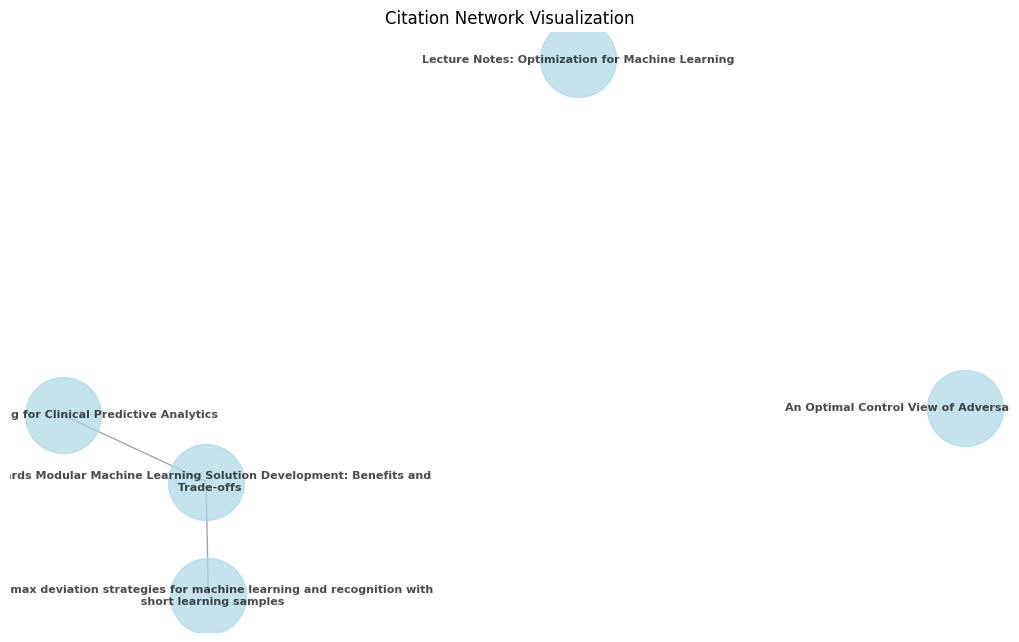

In [185]:
plt.figure(figsize=(10, 6)) # Set plot size
pos = nx.spring_layout(G, seed=42) # Apply a spring layout
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=8, font_weight="bold", alpha=0.7) # Draw the network
plt.title("Citation Network Visualization")
plt.show()

---
---

---
---

# Create a User Interface

In [186]:
import ipywidgets as widgets

In [187]:
from IPython.display import display, clear_output

In [188]:
# Create input widget

In [189]:
query_input = widgets.Text(
    placeholder="Enter search query...",
    description="Query:",
    layout=widgets.Layout(width="50%")
)

In [190]:
# Create output widget

In [191]:
output = widgets.Output()

In [192]:
# Function to update search results

In [193]:
def search_papers(query):
    with output:
        clear_output(wait=True)
        print(f"🔍 Searching for: {query}")

        # Fetch papers from arXiv (assuming fetch_papers function is defined)
        papers = fetch_papers(query, max_results=5)  # Adjust max_results as needed

        if not papers:  # Handle empty response
            print("⚠️ No papers found. Try a different query.")
            return

        for i, paper in enumerate(papers, 1):
            # Handle missing keys gracefully
            title = paper.get('title', 'Title not available')
            authors = ', '.join(paper.get('authors', ['Unknown']))
            link = paper.get('link', 'No link available')
            abstract = paper.get('abstract', 'No abstract available')[:300]

            print(f"\n🔹 Paper {i}: {title}\n🔹 Authors: {authors}\n🔹 Link: {link}\n🔹 Abstract: {abstract}...")


In [194]:
# Function to visualize the citation network

In [195]:
def visualize_network(_):
    with output:
        clear_output(wait=True)

        if G.number_of_nodes() == 0:
            print("⚠️ No citation network data available. Run a search first.")
            return

        plt.figure(figsize=(10, 6))
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray",
                font_size=8, font_weight="bold", alpha=0.7)
        plt.title("Citation Network Visualization")
        plt.show()


In [196]:
# Create buttons

In [197]:
search_button = widgets.Button(description="Search")

In [198]:
search_button.on_click(lambda _: search_papers(query_input.value))

In [199]:
visualize_button = widgets.Button(description="Visualize Network")

In [200]:
visualize_button.on_click(visualize_network)

In [201]:
# Display UI

In [202]:
display(query_input, search_button, visualize_button, output)

Text(value='', description='Query:', layout=Layout(width='50%'), placeholder='Enter search query...')

Button(description='Search', style=ButtonStyle())

Button(description='Visualize Network', style=ButtonStyle())

Output()